In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dhruvildave/new-york-city-taxi-trips-2019
!unzip new-york-city-taxi-trips-2019.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dhruvildave/new-york-city-taxi-trips-2019
License(s): ODC Attribution License (ODC-By)
100% 2.38G/2.38G [00:27<00:00, 133MB/s]
100% 2.38G/2.38G [00:27<00:00, 92.6MB/s]
Archive:  new-york-city-taxi-trips-2019.zip
  inflating: 2019/2019-01.sqlite     
  inflating: 2019/2019-02.sqlite     
  inflating: 2019/2019-03.sqlite     
  inflating: 2019/2019-04.sqlite     
  inflating: 2019/2019-05.sqlite     
  inflating: 2019/2019-06.sqlite     
  inflating: 2019/2019-07.sqlite     
  inflating: 2019/2019-08.sqlite     
  inflating: 2019/2019-09.sqlite     
  inflating: 2019/2019-10.sqlite     
  inflating: 2019/2019-11.sqlite     
  inflating: 2019/2019-12.sqlite     
  inflating: data_dictionary.pdf     
  inflating: taxi_zone_lookup.csv    
  inflating: taxi_zones/taxi_zones.dbf  
  inflating: taxi_zones/taxi_zones.pr

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!wget https://repo1.maven.org/maven2/org/xerial/sqlite-jdbc/3.34.0/sqlite-jdbc-3.34.0.jar
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install -q pysqlite3

--2024-05-18 11:34:41--  https://repo1.maven.org/maven2/org/xerial/sqlite-jdbc/3.34.0/sqlite-jdbc-3.34.0.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7296329 (7.0M) [application/java-archive]
Saving to: ‘sqlite-jdbc-3.34.0.jar’

sqlite-jdbc-3.34.0. 100%[===================>]   6.96M  --.-KB/s    in 0.1s    

2024-05-18 11:34:41 (68.2 MB/s) - ‘sqlite-jdbc-3.34.0.jar’ saved [7296329/7296329]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.1-bin-hadoop3.2'

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Predicate Pushdown") \
    .config('spark.jars.packages', 'org.xerial:sqlite-jdbc:3.39.3.0') \
    .master("local[*]") \
    .getOrCreate()
spark

In [4]:
driver: str = "org.sqlite.JDBC"
db_path01: str = "2019/2019-01.sqlite"
db_path02: str = "2019/2019-02.sqlite"
db_path03: str = "2019/2019-03.sqlite"
db_path04: str = "2019/2019-04.sqlite"
db_path05: str = "2019/2019-05.sqlite"
db_path06: str = "2019/2019-06.sqlite"
db_path07: str = "2019/2019-07.sqlite"
db_path08: str = "2019/2019-08.sqlite"
db_path09: str = "2019/2019-09.sqlite"
db_path10: str = "2019/2019-10.sqlite"
db_path11: str = "2019/2019-11.sqlite"
db_path12: str = "2019/2019-12.sqlite"
jdbc_url01: str = "jdbc:sqlite:" + db_path02
jdbc_url02: str = "jdbc:sqlite:" + db_path01
jdbc_url03: str = "jdbc:sqlite:" + db_path03
jdbc_url04: str = "jdbc:sqlite:" + db_path04
jdbc_url05: str = "jdbc:sqlite:" + db_path05
jdbc_url06: str = "jdbc:sqlite:" + db_path06
jdbc_url07: str = "jdbc:sqlite:" + db_path07
jdbc_url08: str = "jdbc:sqlite:" + db_path08
jdbc_url09: str = "jdbc:sqlite:" + db_path09
jdbc_url10: str = "jdbc:sqlite:" + db_path10
jdbc_url11: str = "jdbc:sqlite:" + db_path11
jdbc_url12: str = "jdbc:sqlite:" + db_path12
table_name: str = "tripdata"

In [5]:
df01 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url01) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df01.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-02-01          |2019-02-01           |1.0            |2.1          |1.0       |N                 |48.0        |234.0       |1.0         |9.0        |0.5  |0.5    |2.0       |0.0         |0.3                  

In [6]:
df02 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url02) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df02.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-01-01          |2019-01-01           |1.0            |1.5          |1.0       |N                 |151.0       |239.0       |1.0         |7.0        |0.5  |0.5    |1.65      |0.0         |0.3                  

In [7]:
df03 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url03) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df03.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-03-01          |2019-03-01           |1.0            |0.0          |1.0       |N                 |145.0       |145.0       |2.0         |2.5        |0.5  |0.5    |0.0       |0.0         |0.3                  

In [8]:
df04 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url04) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df04.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-04-01          |2019-04-01           |1.0            |0.5          |1.0       |N                 |239.0       |239.0       |1.0         |4.0        |3.0  |0.5    |1.0       |0.0         |0.3                  

In [9]:
df04 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url04) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df04.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-04-01          |2019-04-01           |1.0            |0.5          |1.0       |N                 |239.0       |239.0       |1.0         |4.0        |3.0  |0.5    |1.0       |0.0         |0.3                  

In [10]:
df05 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url05) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df05.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-05-01          |2019-05-01           |1.0            |0.0          |1.0       |N                 |145.0       |145.0       |2.0         |3.0        |0.5  |0.5    |0.0       |0.0         |0.3                  

In [11]:
df06 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url06) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df06.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-06-01          |2019-06-01           |1.0            |0.0          |1.0       |N                 |145.0       |145.0       |2.0         |3.0        |0.5  |0.5    |0.0       |0.0         |0.3                  

In [12]:
df07 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url07) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df07.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|2.0     |2019-07-01          |2019-07-01           |1.0            |0.0          |1.0       |N                 |193.0       |193.0       |1.0         |2.5        |0.5  |0.5    |1.14      |0.0         |0.3                  

In [13]:
df08 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url08) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df08.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-08-01          |2019-08-01           |1.0            |0.0          |1.0       |N                 |145.0       |145.0       |2.0         |2.5        |0.5  |0.5    |0.0       |0.0         |0.3                  

In [14]:
df09 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url09) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df09.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-09-01          |2019-09-01           |1.0            |2.0          |1.0       |N                 |186.0       |161.0       |2.0         |13.0       |3.0  |0.5    |0.0       |0.0         |0.3                  

In [15]:
df10 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url10) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df10.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-10-01          |2019-10-01           |1.0            |0.4          |1.0       |N                 |48.0        |163.0       |2.0         |4.5        |3.0  |0.5    |0.0       |0.0         |0.3                  

In [16]:
df11 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url11) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df11.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-11-01          |2019-11-01           |1.0            |0.0          |1.0       |N                 |145.0       |145.0       |2.0         |3.0        |0.5  |0.5    |0.0       |0.0         |0.3                  

In [17]:
df12 = spark \
    .read \
    .format("jdbc") \
    .option("driver", driver) \
    .option("url", jdbc_url12) \
    .option("dbtable", table_name) \
    .load()
# df.printSchema()
df12.show(10, False)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|1.0     |2019-12-01          |2019-12-01           |1.0            |4.2          |1.0       |N                 |142.0       |116.0       |2.0         |14.5       |3.0  |0.5    |0.0       |0.0         |0.3                  

In [18]:
# required columns
# x = passenger_count, trip_distance, ratecodeid, pulocationid, dolocationid, fare_amount
# y = total_amount

In [19]:
def spark_shape(self):
    return (self.count(), len(self.columns))

In [22]:
spark_shape(df01)

(7019375, 18)

In [20]:
from functools import reduce
from pyspark.sql import DataFrame

#specify DataFrames to concatenate
df_list = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12]

#vertically concatenate all DataFrames in list
df_all = reduce(DataFrame.unionAll, df_list)

#view resulting DataFrame
df_all.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|vendorid|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|ratecodeid|store_and_fwd_flag|pulocationid|dolocationid|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|     1.0|          2019-02-01|           2019-02-01|            1.0|          2.1|       1.0|                 N|        48.0|       234.0|         1.0|        9.0|  0.5|    0.5|       2.0|         0.0|                  0.3

In [24]:
spark_shape(df_all)

(84399019, 18)

In [21]:
df_req = df_all.select(['trip_distance', 'fare_amount', 'total_amount'])

In [22]:
df_nonull = df_req.na.drop()

In [29]:
spark_shape(df_nonull)

(84152418, 18)

In [30]:
df_plot = df_nonull.limit(1000)

In [34]:
df_plot.show()

+---------------+-------------+----------+------------+------------+-----------+------------+
|passenger_count|trip_distance|ratecodeid|pulocationid|dolocationid|fare_amount|total_amount|
+---------------+-------------+----------+------------+------------+-----------+------------+
|            1.0|          2.1|       1.0|        48.0|       234.0|        9.0|        12.3|
|            1.0|          9.8|       1.0|       230.0|        93.0|       32.0|        33.3|
|            1.0|          0.0|       1.0|       145.0|       145.0|        2.5|         3.8|
|            1.0|          0.8|       1.0|        95.0|        95.0|        5.5|         6.8|
|            1.0|          0.8|       1.0|       140.0|       263.0|        5.0|         6.3|
|            1.0|          0.8|       1.0|       229.0|       141.0|        4.5|         5.8|
|            1.0|          0.9|       1.0|        75.0|        41.0|        5.0|         6.3|
|            1.0|          2.8|       1.0|       246.0|     

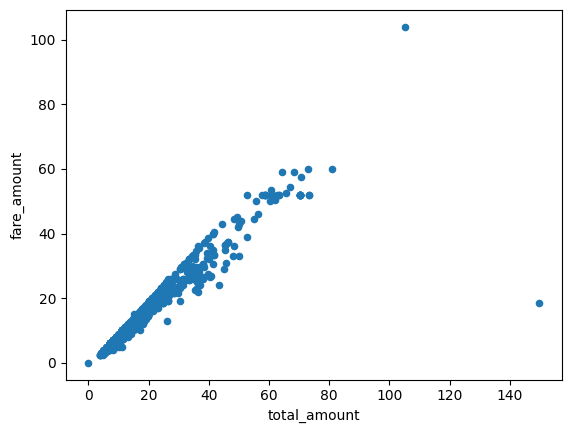

In [77]:
import matplotlib.pyplot as plt

df_pandas = df_plot.toPandas()
df_pandas.plot.scatter(x='total_amount', y='fare_amount')
plt.show()

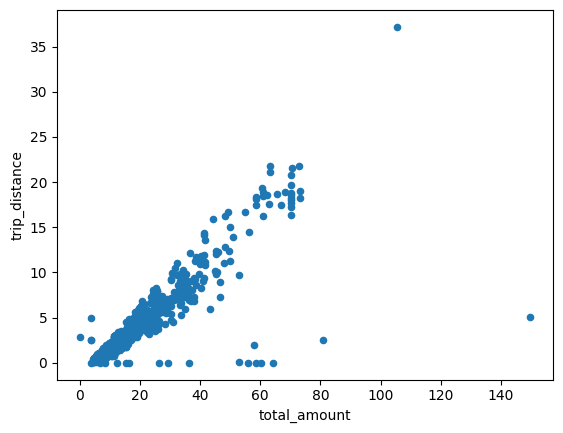

In [44]:
df_pandas.plot.scatter(x='total_amount', y='trip_distance')
plt.show()

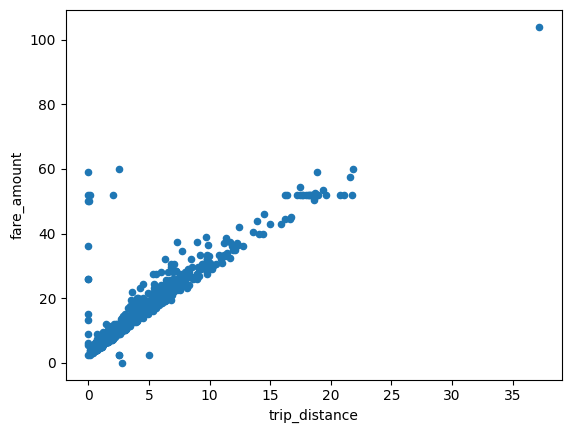

In [45]:
df_pandas.plot.scatter(x='trip_distance', y='fare_amount')
plt.show()

In [49]:
df_pandas.corr()

,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,fare_amount,total_amount
passenger_count,1.000000,-0.017817,-0.058146,-0.031410,-0.062201,-0.023941,-0.019431
trip_distance,-0.017817,1.000000,0.116349,-0.050439,-0.019379,0.911352,0.872169
ratecodeid,-0.058146,0.116349,1.000000,0.007265,0.034158,0.366229,0.340844
pulocationid,-0.031410,-0.050439,0.007265,1.000000,0.107264,-0.032235,-0.036278
dolocationid,-0.062201,-0.019379,0.034158,0.107264,1.000000,-0.013838,0.001705
fare_amount,-0.023941,0.911352,0.366229,-0.032235,-0.013838,1.000000,0.945282
total_amount,-0.019431,0.872169,0.340844,-0.036278,0.001705,0.945282,1.000000


In [51]:
# Using both fare_amount and trip distance columns even though it has multicolinearity problem since we only want to make a prediction, we do not want to know the value of co efficients
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=['trip_distance', 'fare_amount'], outputCol='Independent features')
output = feature_assembler.transform(df_nonull)

In [54]:
final_df = output.select(['Independent features', 'total_amount'])
final_df.show()

+--------------------+------------+
|Independent features|total_amount|
+--------------------+------------+
|[2.09999990463256...|        12.3|
|[9.80000019073486...|        33.3|
|           [0.0,2.5]|         3.8|
|[0.80000001192092...|         6.8|
|[0.80000001192092...|         6.3|
|[0.80000001192092...|         5.8|
|[0.89999997615814...|         6.3|
|[2.79999995231628...|        15.3|
|[2.09999990463256...|        11.8|
|[0.49000000953674...|         7.0|
|[1.61000001430511...|       11.62|
|           [1.5,7.5]|       10.56|
|[1.79999995231628...|       12.35|
|[0.80000001192092...|         8.8|
|[0.40000000596046...|         5.8|
|[4.42999982833862...|       24.75|
|           [1.0,6.0]|         7.3|
|          [9.0,26.0]|        34.8|
|[1.79999995231628...|       11.75|
|[10.3000001907348...|        34.3|
+--------------------+------------+
only showing top 20 rows



In [62]:
from pyspark.ml.regression import LinearRegression

train_data, test_data = final_df.randomSplit([0.8, 0.2])
model = LinearRegression(featuresCol = 'Independent features', labelCol = 'total_amount')
pred = model.fit(train_data)

In [63]:
eval = pred.evaluate(test_data)
eval.predictions.show()

+--------------------+------------+-----------------+
|Independent features|total_amount|       prediction|
+--------------------+------------+-----------------+
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|         0.0|4.593160228621552|
|           (2,[],[])|      

In [66]:
eval.r2, eval.meanAbsoluteError, eval.meanSquaredError

(0.9957993386248388, 2.057147987458262, 74.06376873996042)